In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

### Clasificador de Vinos con KNN
Entrena un modelo de K-Vecinos más Cercanos (KNN) para predecir la calidad de un vino tinto a partir de sus características químicas. ¿Podría una IA ayudarte a elegir un vino digno de sommelier?

Utilizaremos el siguiente dataset de vinos tintos extraido de Wine Quality Data Set - UCI

### Descripción de las columnas
Cada fila representa un vino. Las columnas describen su composición química:

fixed acidity, volatile acidity, citric acid

residual sugar, chlorides

free sulfur dioxide, total sulfur dioxide

density, pH, sulphates, alcohol

La columna objetivo es label:

0 = Baja calidad

1 = Calidad media

2 = Alta calidad

## Paso 1: Cargar los datos.

## EDA.

In [111]:
df =  pd.read_csv('/workspaces/Antonio27M-machine-learning/data/raw/proyecto08ml.csv', sep=';')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [113]:
df.drop_duplicates(inplace=True)

In [114]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [115]:
df['quality'].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

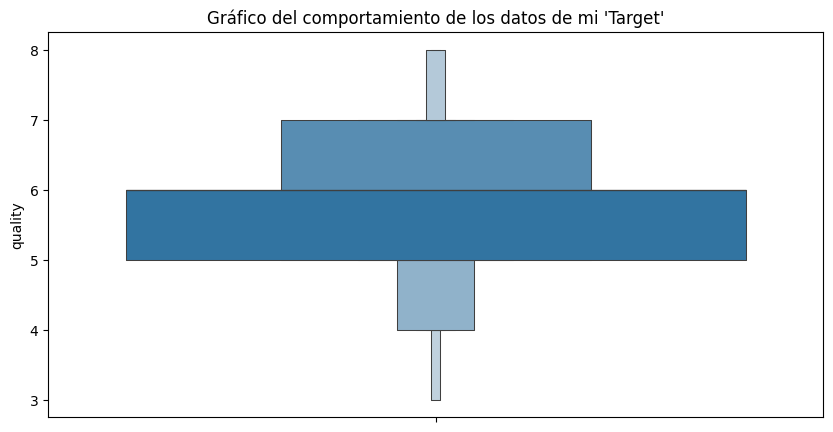

In [116]:
plt.figure(figsize=(10,5))
sns.boxenplot(data=df['quality'])
plt.title("Gráfico del comportamiento de los datos de mi 'Target'")
plt.show()

In [117]:

df["quality"] = np.select([df["quality"].isin([3, 4]),df["quality"].isin([5, 6]),df["quality"].eq(7, 8)],[0, 1, 2],default=df["quality"])


In [118]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


### Observaciones:

Calidades = {0: 'Baja calidad', 1: 'Media calidad', 2: 'Alta calidad'}

## Paso 2: Entrena el modelo KNN.

## slipt. 

In [119]:
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=18)

In [120]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1403,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0
844,9.9,0.25,0.46,1.7,0.062,26.0,42.0,0.99590,3.18,0.83,10.6
295,10.8,0.50,0.46,2.5,0.073,5.0,27.0,1.00010,3.05,0.64,9.5
825,7.1,0.46,0.14,2.8,0.076,15.0,37.0,0.99624,3.36,0.49,10.7
1019,7.0,0.50,0.14,1.8,0.078,10.0,23.0,0.99636,3.53,0.61,10.4
...,...,...,...,...,...,...,...,...,...,...,...
118,8.8,0.55,0.04,2.2,0.119,14.0,56.0,0.99620,3.21,0.60,10.9
1133,7.2,0.48,0.07,5.5,0.089,10.0,18.0,0.99684,3.37,0.68,11.2
775,7.2,1.00,0.00,3.0,0.102,7.0,16.0,0.99586,3.43,0.46,10.0
1041,6.9,0.49,0.19,1.7,0.079,13.0,26.0,0.99547,3.38,0.64,9.8


## Escalado.

In [121]:
norm_scaler = StandardScaler() 

num_variables = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
X_train_num = pd.DataFrame(norm_scaler.fit_transform(X_train[num_variables]),index=X_train.index, columns=[num_variables])
X_test_num = pd.DataFrame(norm_scaler.transform(X_test[num_variables]),index=X_test.index, columns=[num_variables])

In [122]:
X_test_num

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1403,-0.639425,-1.079420,0.287512,-0.604210,-0.548039,-1.236342,-1.009957,-0.388161,-0.528588,2.582579,-0.418129
844,0.897551,-1.513705,0.946419,-0.604210,-0.528084,0.957397,-0.145846,-0.441580,-0.849294,0.995359,0.138504
295,1.409877,-0.156564,0.946419,-0.030105,-0.308578,-1.045582,-0.592800,1.802024,-1.683128,-0.121574,-0.881989
825,-0.696350,-0.373707,-0.675507,0.185184,-0.248713,-0.091782,-0.294830,-0.259955,0.305245,-1.003363,0.231276
1019,-0.753275,-0.156564,-0.675507,-0.532447,-0.208803,-0.568682,-0.711987,-0.195852,1.395643,-0.297932,-0.047040
...,...,...,...,...,...,...,...,...,...,...,...
118,0.271376,0.114864,-1.182360,-0.245394,0.609354,-0.187162,0.271311,-0.281323,-0.656871,-0.356718,0.416820
1133,-0.639425,-0.265136,-1.030304,2.122789,0.010703,-0.568682,-0.860972,0.060560,0.369386,0.113570,0.695136
775,-0.639425,2.557717,-1.385100,0.328711,0.270118,-0.854822,-0.920566,-0.462948,0.754233,-1.179721,-0.418129
1041,-0.810200,-0.210850,-0.422081,-0.604210,-0.188848,-0.282542,-0.622597,-0.671282,0.433528,-0.121574,-0.603673


### 

In [123]:
model = KNeighborsClassifier()
model.fit(X_train_num, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [124]:
y_pred_test = model.predict(X_test_num)
y_pred_train = model.predict(X_train_num)

y_pred_test

array([1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2])

## Paso 3: Evalúa el rendimiento usando.

In [125]:
accuracy_score(y_test, y_pred_test)

0.8308823529411765

In [126]:
classification_report(y_test, y_pred_test, output_dict=True)

{'0': {'precision': 1.0,
  'recall': 0.07692307692307693,
  'f1-score': 0.14285714285714285,
  'support': 13.0},
 '1': {'precision': 0.8482490272373541,
  'recall': 0.9775784753363229,
  'f1-score': 0.9083333333333333,
  'support': 223.0},
 '2': {'precision': 0.5,
  'recall': 0.21212121212121213,
  'f1-score': 0.2978723404255319,
  'support': 33.0},
 '8': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0},
 'accuracy': 0.8308823529411765,
 'macro avg': {'precision': 0.5870622568093385,
  'recall': 0.316655691095153,
  'f1-score': 0.33726570415400203,
  'support': 272.0},
 'weighted avg': {'precision': 0.8038953421835661,
  'recall': 0.8308823529411765,
  'f1-score': 0.7876664096489661,
  'support': 272.0}}

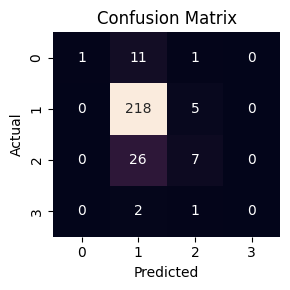

In [127]:
df_confusion = confusion_matrix(y_test, y_pred_test )
df_cm = pd.DataFrame(df_confusion)
plt.figure(figsize=(3, 3))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

### Guardado del modelo. 

In [128]:
with open('/workspaces/Antonio27M-machine-learning/models/modelado-knearest-proyecto08.pkl', 'wb') as file:
    pickle.dump(model, file)

### Hiperparametrizacion. 

In [129]:
hiper_params = {'n_neighbors': [11, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35],
                'weights': ['uniform', 'distance'],
                'p': [1, 2]}

In [130]:
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=hiper_params,
                                   n_iter=50,
                                   cv=5,
                                   scoring='accuracy',
                                   random_state=42,
                                   n_jobs=-1)

random_search.fit(X_train_num, y_train)
random_search.best_params_

{'weights': 'distance', 'p': 2, 'n_neighbors': 21}

In [131]:
random_search.best_score_

0.8353105314336448

In [132]:
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(X_test_num)
accuracy_score(y_test, y_pred)


0.8308823529411765

In [133]:
classification_report(y_test, y_pred, output_dict=True)

{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 13.0},
 '1': {'precision': 0.8515625,
  'recall': 0.9775784753363229,
  'f1-score': 0.9102296450939458,
  'support': 223.0},
 '2': {'precision': 0.5,
  'recall': 0.24242424242424243,
  'f1-score': 0.32653061224489793,
  'support': 33.0},
 '8': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0},
 'accuracy': 0.8308823529411765,
 'macro avg': {'precision': 0.337890625,
  'recall': 0.3050006794401413,
  'f1-score': 0.3091900643347109,
  'support': 272.0},
 'weighted avg': {'precision': 0.7588177849264706,
  'recall': 0.8308823529411765,
  'f1-score': 0.7858702980148218,
  'support': 272.0}}

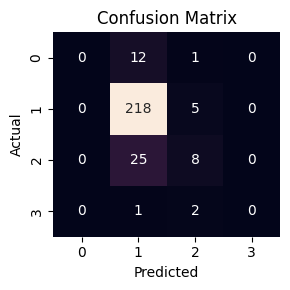

In [134]:
df_confusion = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(df_confusion)
plt.figure(figsize=(3, 3))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

### Paso 4: Optimización de k.

In [136]:
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_num, y_train)
    
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    accuracies.append(acc)

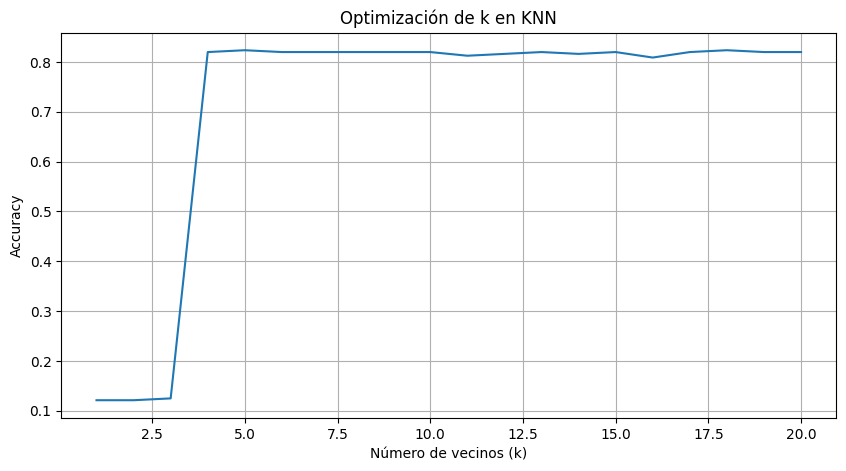

In [138]:
plt.figure(figsize=(10,5))
plt.plot(k_values, accuracies)
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Accuracy')
plt.title('Optimización de k en KNN')
plt.grid(True)
plt.show()

### Conclusiones generales. 

Según la primera matriz, me da información de que el modelo es más efectivo prediciendo los vinos de media calidad; sus extremos se le hace más difícil hacerlo. 
El k vs. accuracy me da información sobre qué k es más estable después del valor aproximado a 4; deduzco que antes de eso, los valores tienen overfitting es probable que se deban utilizar valores alrededor del k = 5 o 6. 